<a href="https://colab.research.google.com/github/xhxuciedu/CS284A/blob/master/dim_reduction_algorithm_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline


# Comparison of Dimension Reduction Techniques

A comparison of several different dimension reduction
techniques on a variety of toy datasets. The datasets
are all toy datasets, but should provide a representative
range of the strengths and weaknesses of the different
algorithms.

The time to perform the dimension reduction with each
algorithm and each dataset is recorded in the lower
right of each plot.

Things to note about the datasets:

- Blobs: A set of five gaussian blobs in 10 dimensional
         space. This should be a prototypical example
         of something that should clearly separate
         even in a reduced dimension space.
- Iris: a classic small dataset with one distinct class
        and two classes that are not clearly separated.
- Digits: handwritten digits -- ideally different digit
          classes should form distinct groups. Due to
          the nature of handwriting digits may have several
          forms (crossed or uncrossed sevens, capped or
          straight line oes, etc.)
- Wine: wine characteristics ideally used for a toy
        regression. Ultimately the data is essentially
        one dimensional in nature.
- Swiss Roll: data is essentially a rectangle, but
              has been "rolled up" like a swiss roll
              in three dimensional space. Ideally a
              dimension reduction technique should
              be able to "unroll" it. The data
              has been coloured according to one dimension
              of the rectangle, so should form
              a rectangle of smooth color variation.
- Sphere: the two dimensional surface of a three
          dimensional sphere. This cannot be represented
          accurately in two dimensions without tearing.
          The sphere has been coloured with hue around
          the equator and black to white from the south
          to north pole.


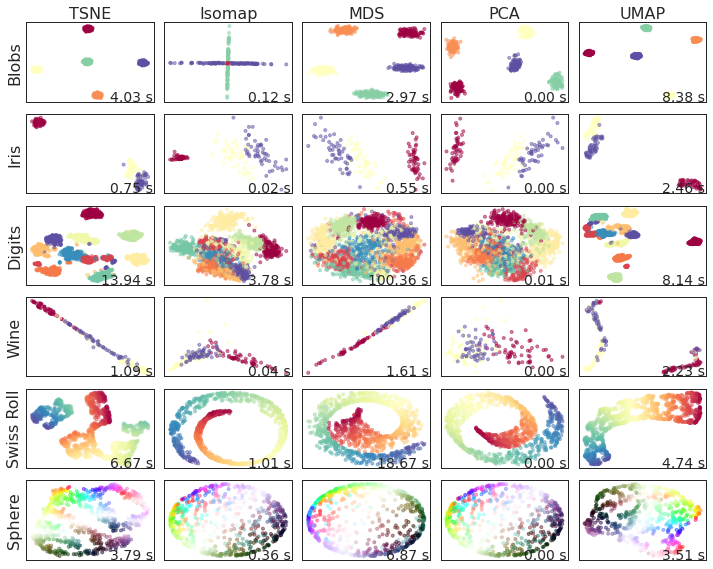

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn import datasets, decomposition, manifold, preprocessing
from colorsys import hsv_to_rgb

import umap

sns.set(context="paper", style="white")

blobs, blob_labels = datasets.make_blobs(
    n_samples=500, n_features=10, centers=5, random_state=42
)
iris = datasets.load_iris()
digits = datasets.load_digits(n_class=10)
wine = datasets.load_wine()
swissroll, swissroll_labels = datasets.make_swiss_roll(
    n_samples=1000, noise=0.1, random_state=42
)
sphere = np.random.normal(size=(600, 3))
sphere = preprocessing.normalize(sphere)
sphere_hsv = np.array(
    [
        (
            (np.arctan2(c[1], c[0]) + np.pi) / (2 * np.pi),
            np.abs(c[2]),
            min((c[2] + 1.1), 1.0),
        )
        for c in sphere
    ]
)
sphere_colors = np.array([hsv_to_rgb(*c) for c in sphere_hsv])

reducers = [
    (manifold.TSNE, {"perplexity": 50}),
    # (manifold.LocallyLinearEmbedding, {'n_neighbors':10, 'method':'hessian'}),
    (manifold.Isomap, {"n_neighbors": 30}),
    (manifold.MDS, {}),
    (decomposition.PCA, {}),
    (umap.UMAP, {"n_neighbors": 30, "min_dist": 0.3}),
]

test_data = [
    (blobs, blob_labels),
    (iris.data, iris.target),
    (digits.data, digits.target),
    (wine.data, wine.target),
    (swissroll, swissroll_labels),
    (sphere, sphere_colors),
]
dataset_names = ["Blobs", "Iris", "Digits", "Wine", "Swiss Roll", "Sphere"]

n_rows = len(test_data)
n_cols = len(reducers)
ax_index = 1
ax_list = []

# plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.figure(figsize=(10, 8))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)
for data, labels in test_data:
    for reducer, args in reducers:
        start_time = time.time()
        embedding = reducer(n_components=2, **args).fit_transform(data)
        elapsed_time = time.time() - start_time
        ax = plt.subplot(n_rows, n_cols, ax_index)
        if isinstance(labels[0], tuple):
            ax.scatter(*embedding.T, s=10, c=labels, alpha=0.5)
        else:
            ax.scatter(*embedding.T, s=10, c=labels, cmap="Spectral", alpha=0.5)
        ax.text(
            0.99,
            0.01,
            "{:.2f} s".format(elapsed_time),
            transform=ax.transAxes,
            size=14,
            horizontalalignment="right",
        )
        ax_list.append(ax)
        ax_index += 1
plt.setp(ax_list, xticks=[], yticks=[])

for i in np.arange(n_rows) * n_cols:
    ax_list[i].set_ylabel(dataset_names[i // n_cols], size=16)
for i in range(n_cols):
    ax_list[i].set_xlabel(repr(reducers[i][0]()).split("(")[0], size=16)
    ax_list[i].xaxis.set_label_position("top")

plt.tight_layout()
plt.show()